# <span style='font-family:Garamond'><span style='color:#B21807'> <h4 align="center"> Clusterings effectués et différentes visualisations associées.</h4> </span>

***

# <span style='font-family:Garamond'><span style='color:#B21807'>Table des matières : </span>

* [Introduction](#chapter0)
    * [0.1 Contexte](#section_0_1)
    * [0.2 import des librairies et tables necessaires](#section_0_2)
* [1 Classification ascendante hierarchique](#chapter1)
    * [1.1 Rappel de son fonctionnement et de l'objectif](#section_1_1)
    * [1.2 Execution de la classification hierarchique](#section_1_2)
    * [1.3 Analyse et observation des resultats de la classification ascendante hierarchique](#section_1_3)
    * [1.4 Conclusion](#section_1_4)
* [2 Clustering méthode k-means](#chapter2)
    * [2.1 Rappel de son fonctionnement et de l'objectif](#section_2_1)
    * [2.2 Execution du clustering avec la methode des k-means](#section_2_2)
    * [2.3 Analyse et observation des resultats de la classification ascendante hierarchique](#section_2_3)
    * [2.4 Conclusion](#section_2_4)
* [3 Conclusion](#chapter3)
    * [3.1 Comparaison des deux methodes](#section_3_1)
    * [3.2 Conclusion](#section_3_1)

# <span style='font-family:Garamond'><span style='color:#B21807'>Introduction</span> <a class="anchor" id="chapter0"></a>

## <span style='font-family:Garamond'><span style='color:#046307'>0.1 Contexte</span> <a class="anchor" id="section_0_1"></a>

<img src="logo_la_poule_qui_chante.png" width="500" height="300">
<div style='font-family:Garamond'><div style='font-size: 20px'> 
    
Dans le notebook précédent, nous avons préparé les données afin de pouvoir utiliser les techniques de clustering qui nous permettront de déterminer les pays candidats à l'exportation de viande de volaille.

L'A.C.P nous avait permis de visualiser grossièrement les pays similaires. Nous allons maintenant pouvoir analyser cela plus précisément en regroupant les individus partageant des caractéristiques communes en classes. Pour cela, nous utiliserons deux méthodes :

La classification ascendante hiérarchique.
- La méthode des k-means.
- Nous comparerons les résultats de chaque méthode, les avantages et les inconvénients de chacune, et enfin, nous répondrons à la question initiale.
    
</div></div>

## <span style='font-family:Garamond'><span style='color:#046307'>0.2 Import des librairies et tables necessaires</span> <a class="anchor" id="section_0_1"></a>

In [93]:
#Import des librairies necessaires

import pandas as pd
import numpy as np

from IPython.display import display, HTML
from IPython.display import Image
from IPython.display import Markdown, display

from collections import defaultdict

import random
import re

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as shc
import scipy.stats as stats

import matplotlib.pyplot as plt 
import seaborn as sns

from math import pi

import folium


# import de la table.
Etude_volaille_par_pays_2017 = pd.read_csv("Etude_volaille_par_pays_2017.csv")
# utiliser la colonne Zone comme index 
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.set_index('Zone')


#Configuration d'une auto sauvegarde toute les 60sec.
%autosave 60

Autosaving every 60 seconds


***

#  <span style='font-family:Garamond'><span style='color:#B21807'>1. Classification ascendante hierarchique</span> <a class="anchor" id="chapter1"></a>

## <span style='font-family:Garamond'>1. Rappel de l'objectif</span> <a class="anchor" id="section_1_1"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>
Objectif : Rassembler les pays en groupes partageant les mêmes caractéristiques afin de déterminer quels sont les pays intéressants pour notre exportation.
    </div></div>

## <span style='font-family:Garamond'>2. Execution de la classification ascendante hierarchique</span> <a class="anchor" id="section_1_2"></a>

In [94]:
Etude_volaille_par_pays_2017

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux)
Zone,,,,,
Afghanistan,29.0,2.0,-2.80,-29.0,520.616409
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572
Albanie,38.0,0.0,0.38,-38.0,4514.204908
Algérie,2.0,13.0,-0.92,-2.0,4109.696001
Allemagne,842.0,0.0,0.59,-196.0,44651.829102
...,...,...,...,...,...
Égypte,110.0,0.0,-1.42,-109.0,2023.331158
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043
Équateur,0.0,17.0,-0.07,0.0,6213.501276


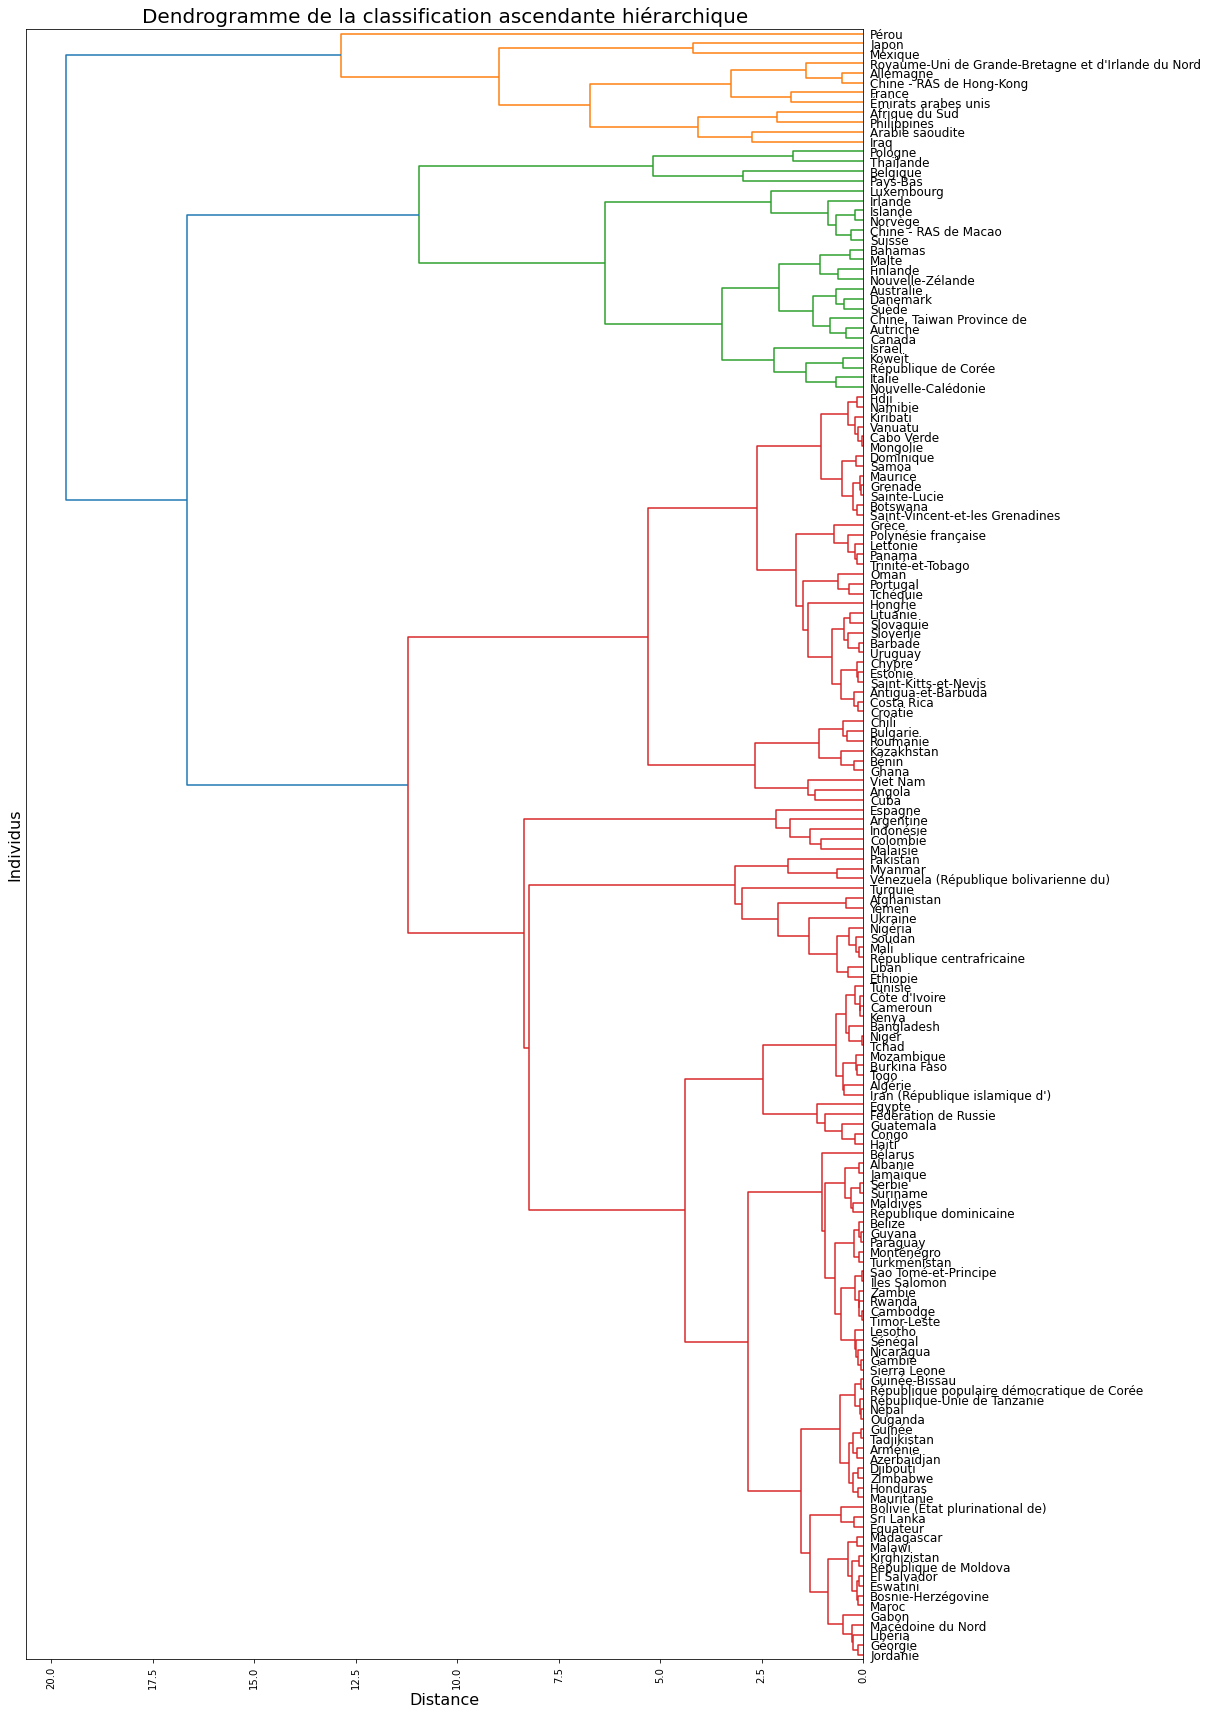

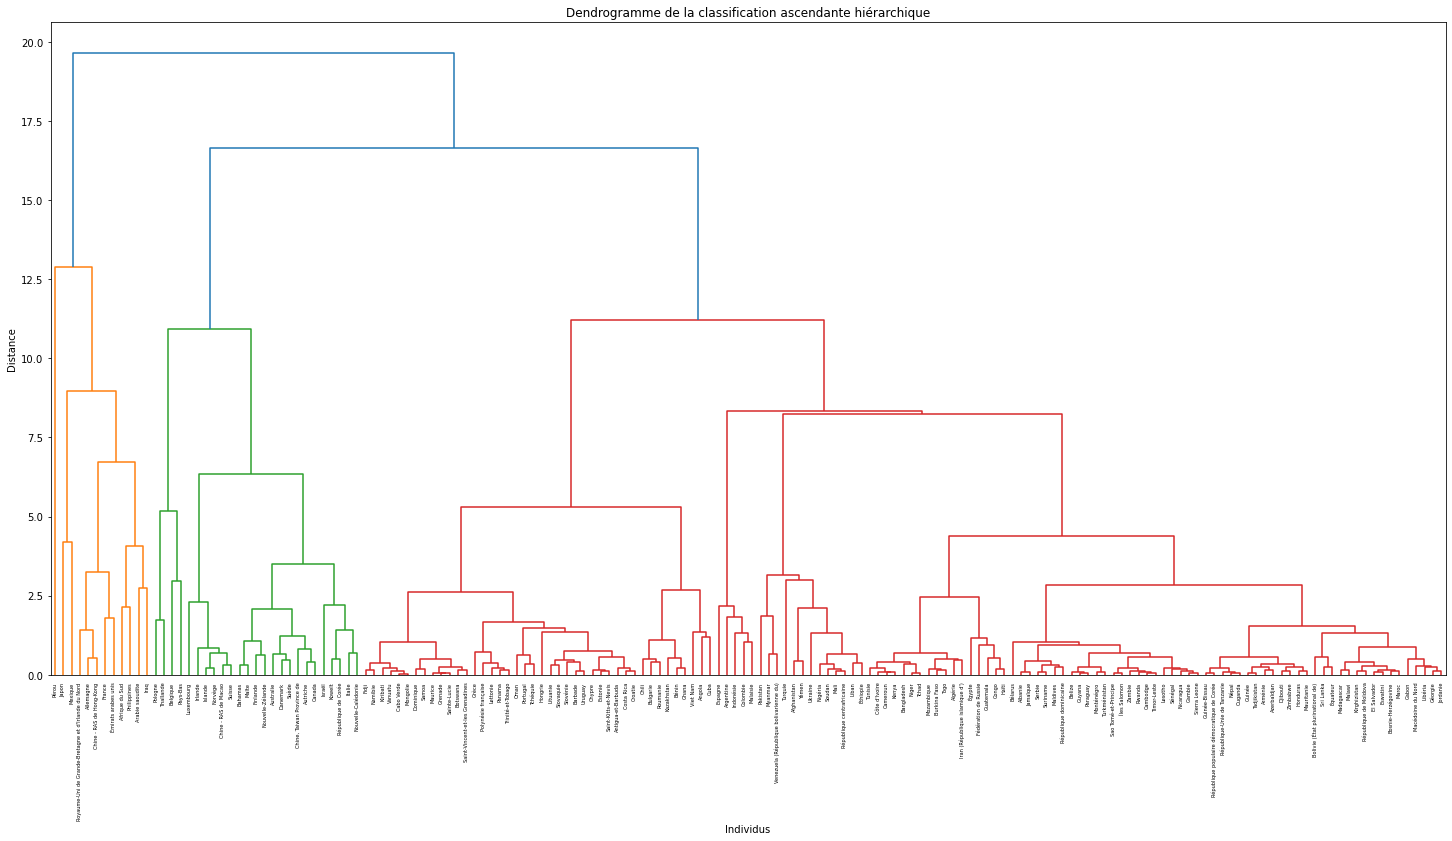

In [95]:
# Normaliser et centrer les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Etude_volaille_par_pays_2017)

# Calculer les liens de la classification ascendante hiérarchique avec la méthode de liaison ward
Z = shc.linkage(X_scaled, method='ward')

# Afficher le dendrogramme avec les étiquettes de chaque individu
plt.figure(figsize=(15, 30))
plt.title("Dendrogramme de la classification ascendante hiérarchique", fontsize=20)
plt.xlabel("Distance", fontsize=16)
plt.ylabel("Individus", fontsize=16)
dendrogram = shc.dendrogram(Z, labels=Etude_volaille_par_pays_2017.index.values, orientation='left', leaf_font_size=14)
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les noms des individus en haut
plt.xticks(rotation=90)  # Faire pivoter l'axe x de 90 degrés
plt.gca().tick_params(axis='y', which='major', labelsize=12)  # Augmenter la taille du texte des noms des individus

# afficher le dendrograme pour choisir le nombre de cluster ( plus petit)
plt.figure(figsize=(25, 12))
plt.title("Dendrogramme de la classification ascendante hiérarchique")
plt.xlabel("Individus")
plt.ylabel("Distance")
dendrogram = shc.dendrogram(Z, labels=Etude_volaille_par_pays_2017.index.values)
plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>
Choix du nombre de clusters :

Le nombre de clusters à utiliser pour une classification ascendante hiérarchique peut être déterminé à partir du dendrogramme en recherchant une zone où les branches se séparent en clusters distincts et bien définis.

Voici la méthode que j'ai utilisée :

- Recherchez la plus grande distance verticale sans croisement entre les branches du dendrogramme. Cette distance verticale correspond à la distance maximale entre les clusters. Elle peut être utilisée comme seuil de coupure pour déterminer le nombre de clusters.
- Tracez une ligne horizontale à la distance verticale trouvée à l'étape 1. Cette ligne horizontale doit couper le dendrogramme en plusieurs branches.
- Comptez le nombre de branches formées. Le nombre de branches correspond au nombre de clusters.
- J'ai décidé de couper autour de 10 en ordonnées, ce qui donne 6 clusters.
    </div></div>

In [96]:
# Clustering hiérarchique avec 6 classes
k = 6  # Nombre de clusters souhaité
labels = fcluster(Z, k, criterion='maxclust')

# Créer une liste de clusters et ajouter chaque individu à la liste correspondante
cluster_list = [[] for i in range(k)]
for i in range(len(labels)):
    cluster_list[labels[i]-1].append(Etude_volaille_par_pays_2017.index[i])
    
# Ajouter une colonne "Numéro de cluster pour la classification hiérarchique" à votre dataframe
Etude_volaille_par_pays_2017 = Etude_volaille_par_pays_2017.assign(Numéro_de_cluster_pour_la_classification_hiérarchique=labels)

## <span style='font-family:Garamond'>3. Analyse et observation des resultats de la classification ascendante hierarchique</span> <a class="anchor" id="section_1_3"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>

Projection sur le graphique des individus
    
</div></div>

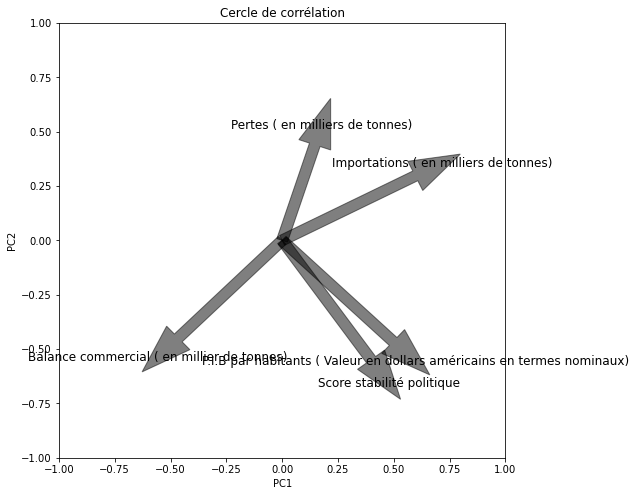

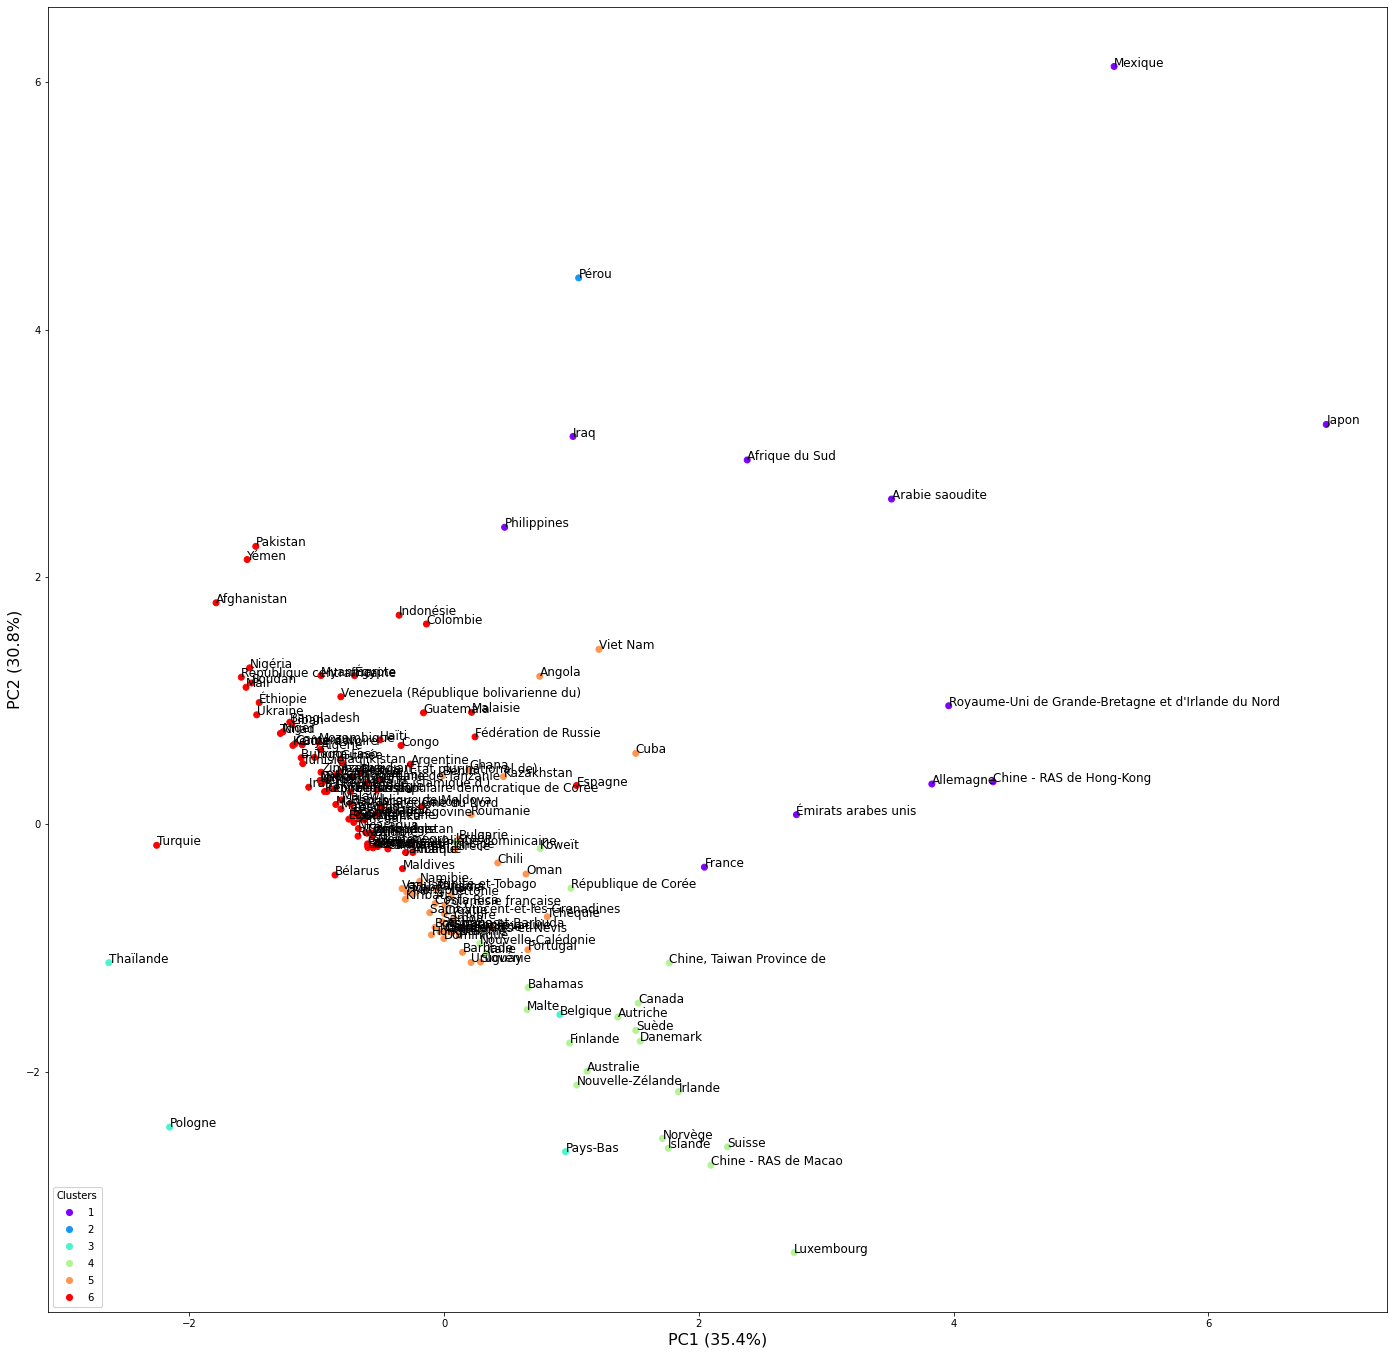

In [97]:
# selection des colonnes numériques
numeric_cols = ['Importations ( en milliers de tonnes)', 'Pertes ( en milliers de tonnes)', 'Score stabilité politique', 'Balance commercial ( en millier de tonnes)', 'P.I.B par habitants ( Valeur en dollars américains en termes nominaux)']
X = Etude_volaille_par_pays_2017[numeric_cols]

# normaliser et centrer les données.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Effectuer une ACP
pca = PCA()
pca.fit(X_scaled)

# Projeter les points des pays sur le plan principal (PC) 1 et 2 :
PC1 = pca.components_[0]
PC2 = pca.components_[1]
X_projected = pca.transform(X_scaled)[:, :2]

# Créer un dataframe contenant les coordonnées des points projetés et les numéros de cluster :
df_projected = pd.DataFrame({'PC1': X_projected[:, 0], 'PC2': X_projected[:, 1], 'Numéro_de_cluster': Etude_volaille_par_pays_2017['Numéro_de_cluster_pour_la_classification_hiérarchique']})

# Afficher le cercle de corrélation :
plt.figure(figsize=(8, 8))
plt.title('Cercle de corrélation')
for i in range(len(numeric_cols)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='black', alpha=0.5, width=0.05)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, numeric_cols[i], color='black', ha='center', va='center', fontsize=12)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Afficher le graphique des individus coloré en fonction de leur cluster :
# Définir la taille de la figure
plt.figure(figsize=(24, 24))

# Créer le scatter plot
scatter = plt.scatter(df_projected['PC1'], df_projected['PC2'], c=df_projected['Numéro_de_cluster'], cmap='rainbow')

# Ajouter le nom de chaque pays à côté du point
for i, txt in enumerate(Etude_volaille_par_pays_2017.index):
    plt.annotate(txt, (df_projected['PC1'][i], df_projected['PC2'][i]), fontsize=12)

# Ajouter la légende pour les clusters
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
plt.gca().add_artist(legend1)

# Définir les titres des axes
plt.xlabel('PC1 ({:.1%})'.format(pca.explained_variance_ratio_[0]), fontsize=16)
plt.ylabel('PC2 ({:.1%})'.format(pca.explained_variance_ratio_[1]), fontsize=16)

# Afficher le graphique
plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>
Heatmap entre les variables et chaque clusters.
</div></div>

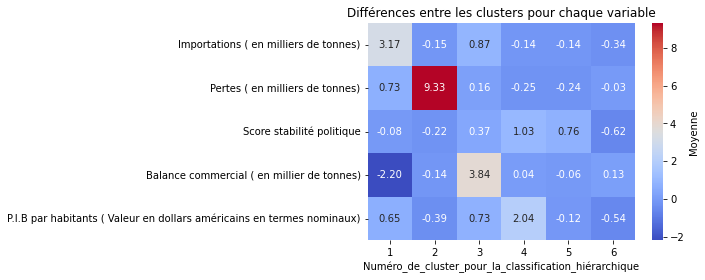

In [98]:
# normaliser les données : 
# Sélectionner les colonnes numériques
numeric_cols = ['Importations ( en milliers de tonnes)', 'Pertes ( en milliers de tonnes)', 'Score stabilité politique', 'Balance commercial ( en millier de tonnes)', 'P.I.B par habitants ( Valeur en dollars américains en termes nominaux)']
X = Etude_volaille_par_pays_2017[numeric_cols]

# Normaliser les données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Créer un dataframe avec les données normalisées
df_std = pd.DataFrame(X_std, columns=numeric_cols, index=Etude_volaille_par_pays_2017.index)
df_std['Numéro_de_cluster_pour_la_classification_hiérarchique'] = Etude_volaille_par_pays_2017['Numéro_de_cluster_pour_la_classification_hiérarchique']

# Créer un dataframe contenant les moyennes de chaque variable par cluster
Etude_volaille_par_pays_2017_CAH_cluster = df_std.groupby('Numéro_de_cluster_pour_la_classification_hiérarchique').mean()

# Transposer le dataframe pour avoir les variables en colonnes
Etude_volaille_par_pays_2017_CAH_cluster = Etude_volaille_par_pays_2017_CAH_cluster.T

# Créer la carte de chaleur
sns.heatmap(Etude_volaille_par_pays_2017_CAH_cluster, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Moyenne'})
plt.title('Différences entre les clusters pour chaque variable')
plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>
Observation des moyennes de chaque variables pour chaque cluster
</div></div>

In [99]:
# Calculer les moyennes de chaque variable pour chaque cluster
Etude_volaille_par_pays_2017_Cluster_CAH = Etude_volaille_par_pays_2017
Etude_volaille_par_pays_2017_par_cluster = Etude_volaille_par_pays_2017.groupby('Numéro_de_cluster_pour_la_classification_hiérarchique').mean()
Etude_volaille_par_pays_2017_par_cluster

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux)
Numéro_de_cluster_pour_la_classification_hiérarchique,,,,,
1,678.454545,33.363636,-0.127273,-464.181818,26860.517098
2,60.000000,316.000000,-0.260000,-59.000000,6710.531503
3,250.750000,14.750000,0.280000,723.000000,28370.456460
4,62.095238,1.380952,0.869524,-24.857143,53806.025560
5,62.595238,1.500000,0.633333,-44.476190,11815.516843
6,25.091954,8.597701,-0.618736,-7.229885,3636.592048


<div style='font-family:Garamond'><div style='font-size: 20px'>
Liste des pays par cluster de la classification ascendante hierarchique
    </div></div>

In [100]:
# Grouper les données par le numéro de cluster
clusters = Etude_volaille_par_pays_2017_Cluster_CAH.groupby('Numéro_de_cluster_pour_la_classification_hiérarchique')
  
    # Afficher les pays dans chaque cluster
for cluster_num, group in clusters:
    pays_cluster = group.index.tolist()
    print(f'Cluster {cluster_num} : {pays_cluster}')

Cluster 1 : ['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Iraq', 'Japon', 'Mexique', 'Philippines', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis']
Cluster 2 : ['Pérou']
Cluster 3 : ['Belgique', 'Pays-Bas', 'Pologne', 'Thaïlande']
Cluster 4 : ['Australie', 'Autriche', 'Bahamas', 'Canada', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Danemark', 'Finlande', 'Irlande', 'Islande', 'Israël', 'Italie', 'Koweït', 'Luxembourg', 'Malte', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'République de Corée', 'Suisse', 'Suède']
Cluster 5 : ['Angola', 'Antigua-et-Barbuda', 'Barbade', 'Botswana', 'Bulgarie', 'Bénin', 'Cabo Verde', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Dominique', 'Estonie', 'Fidji', 'Ghana', 'Grenade', 'Grèce', 'Hongrie', 'Kazakhstan', 'Kiribati', 'Lettonie', 'Lituanie', 'Maurice', 'Mongolie', 'Namibie', 'Oman', 'Panama', 'Polynésie française', 'Portugal', 'Roumanie', 'Saint-Kitts

<div style='font-family:Garamond'><div style='font-size: 20px'>

Box plot de chaque variables pour chaque cluster pour voir la distribution des variables dans chaque cluster 
    </div></div>

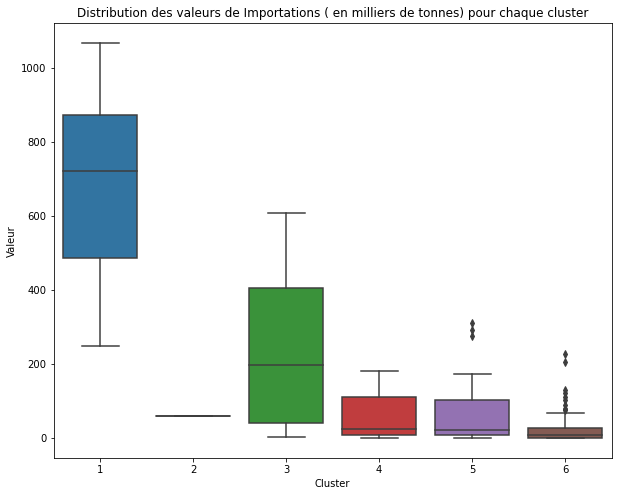

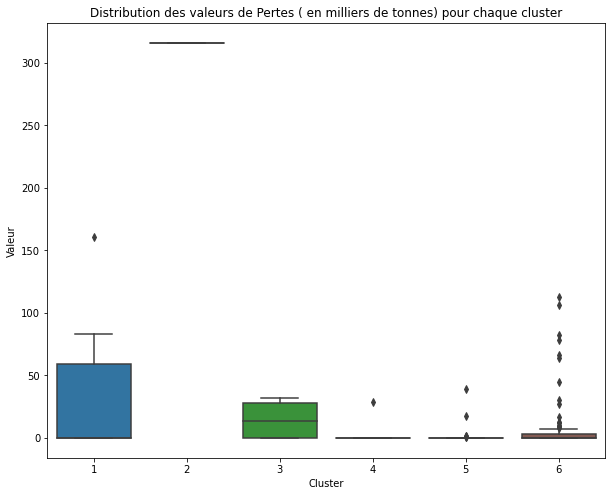

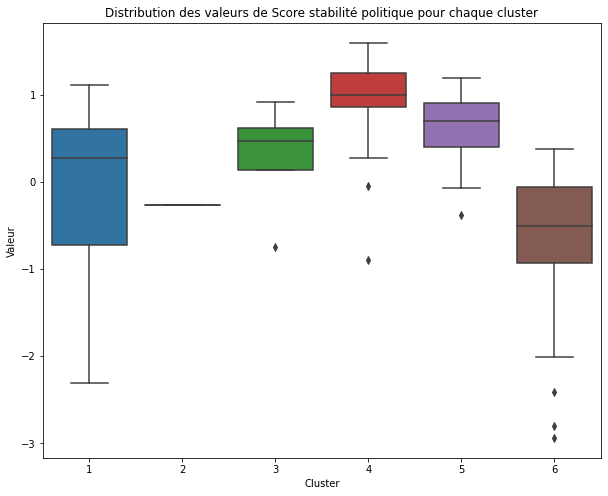

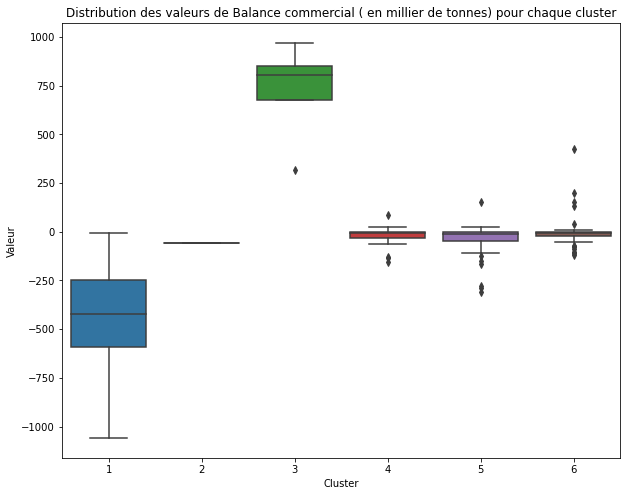

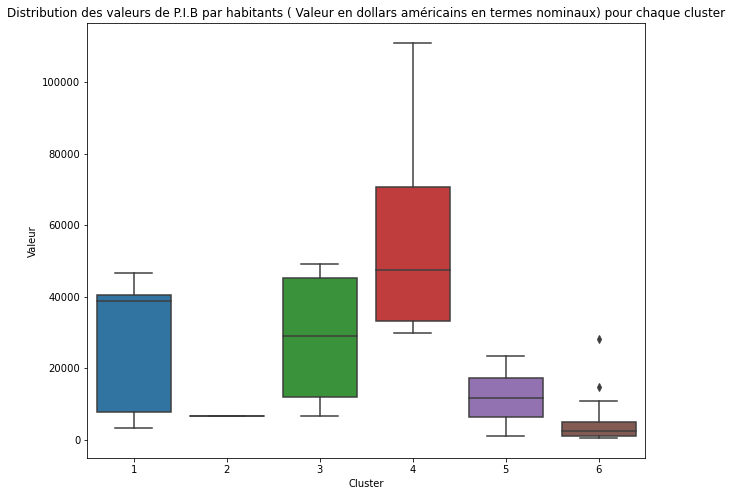

In [101]:
# Sélectionner les colonnes numériques
numeric_cols = ['Importations ( en milliers de tonnes)', 'Pertes ( en milliers de tonnes)', 'Score stabilité politique', 'Balance commercial ( en millier de tonnes)', 'P.I.B par habitants ( Valeur en dollars américains en termes nominaux)']

# Créer un dataframe contenant les données numériques et les clusters attribués
df_clustered = Etude_volaille_par_pays_2017_Cluster_CAH[numeric_cols + ['Numéro_de_cluster_pour_la_classification_hiérarchique']]

# Afficher les boxplots pour chaque variable numérique
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(data=df_clustered, x='Numéro_de_cluster_pour_la_classification_hiérarchique', y=col, ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valeur')
    ax.set_title(f'Distribution des valeurs de {col} pour chaque cluster')
    plt.show()

In [102]:
Etude_volaille_par_pays_2017.loc[['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Iraq', 'Japon', 'Mexique', 'Philippines', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis', 'Pérou']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True)


,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique
Zone,,,,,,
Japon,1069.0,56.0,1.11,-1059.0,38672.407740,1
Mexique,972.0,161.0,-0.80,-963.0,9287.841557,1
Arabie saoudite,722.0,0.0,-0.64,-712.0,20802.464928,1
Iraq,470.0,5.0,-2.31,-470.0,4985.453728,1
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,0.0,0.39,-420.0,40448.365862,1
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043,1
Philippines,249.0,62.0,-1.19,-247.0,3123.244296,1
Chine - RAS de Hong-Kong,907.0,0.0,0.83,-244.0,46705.027813,1


In [103]:
Etude_volaille_par_pays_2017.loc[['Australie', 'Autriche', 'Bahamas', 'Canada', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Danemark', 'Finlande', 'Irlande', 'Islande', 'Israël', 'Italie', 'Koweït', 'Luxembourg', 'Malte', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'République de Corée', 'Suisse', 'Suède']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True)


,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique
Zone,,,,,,
"Chine, Taiwan Province de",161.0,0.0,0.86,-153.0,48786.574408,4
Koweït,137.0,0.0,-0.05,-133.0,29754.636332,4
République de Corée,137.0,0.0,0.39,-131.0,31781.123320,4
Suède,84.0,0.0,0.98,-61.0,54621.345824,4
Suisse,51.0,0.0,1.26,-47.0,83313.013992,4
Autriche,110.0,0.0,1.05,-32.0,47309.051637,4
Bahamas,24.0,0.0,0.99,-24.0,32376.129780,4
Chine - RAS de Macao,23.0,0.0,1.43,-23.0,81043.968655,4
Canada,182.0,0.0,1.10,-19.0,44906.748920,4


In [104]:
# pays retenue classification ascendante hierarchique
Etude_volaille_par_pays_2017.loc[['Japon', 'Mexique', 'Arabie saoudite', 'Afrique du Sud', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis', 'Chine, Taiwan Province de', 'Koweït', 'République de Corée', 'Suède', 'Suisse', 'Autriche', 'Bahamas', 'Chine - RAS de Macao']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True)

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique
Zone,,,,,,
Japon,1069.0,56.0,1.11,-1059.0,38672.407740,1
Mexique,972.0,161.0,-0.80,-963.0,9287.841557,1
Arabie saoudite,722.0,0.0,-0.64,-712.0,20802.464928,1
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,0.0,0.39,-420.0,40448.365862,1
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043,1
"Chine, Taiwan Province de",161.0,0.0,0.86,-153.0,48786.574408,4
Koweït,137.0,0.0,-0.05,-133.0,29754.636332,4
République de Corée,137.0,0.0,0.39,-131.0,31781.123320,4


<div style='font-family:Garamond'><div style='font-size: 20px'>

**Déscription des clusters de la classification ascendante hierarchique :**

<u>**Cluster 1 :**</u>

Pays : Afrique du Sud, Allemagne, Arabie saoudite, Chine - RAS de Hong-Kong, France, Iraq, Japon, Mexique, Philippines, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Émirats arabes unis.

Moyenne des valeurs pour chaque variable :

- Importations (en milliers de tonnes) : 678.454545
- Pertes (en milliers de tonnes) : 33.363636
- Score stabilité politique : -0.127273
- Balance commerciale (en millier de tonnes) : -464.181818
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 26860.517098

Influence des variables : la variable importation en premier lieu.


Le cluster 1 semble être le plus intéressant car il présente un fort déficit de balance commerciale (largement supérieur à celui des autres pays) et une forte importation. Comparativement aux autres groupes, il possède un PIB par habitant correct. Toutefois, il convient d'être vigilant pour certains pays de ce cluster, car leur score de stabilité politique est assez faible, ce qui pourrait entraver l'implantation dans ces pays.

**Selection de pays dans le cluster**

Japon	
Mexique	
Arabie saoudite		
Afrique du Sud	
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord	
Émirats arabes unis


<u>**Cluster 2 :**</u>

Pays : comprend le Perou seulement.

Moyenne des valeurs pour chaque variable :

- Importations (en milliers de tonnes) : 60
- Pertes (en milliers de tonnes) : 316
- Score stabilité politique : -0.26
- Balance commerciale (en millier de tonnes) : -59
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 6710.531503

Influence des variables : Pertes en premier lieu.

Le Pérou est un pays avec une balance commerciale déficitaire, ce qui pourrait en faire un pays candidat de prime abord. Cependant, il possède un PIB par habitant faible et est très éloigné de la France, ce qui ne facilitera pas l'implantation. De plus, il subit de nombreuses pertes, ce qui indique qu'il est difficile de stocker cette viande. Tout cela constitue des obstacles qui l'écartent de la catégorie des pays candidats.
				

<u>**Cluster 3 :**</u>

- Importations (en milliers de tonnes) : 250.750000
- Pertes (en milliers de tonnes) : 14.750000
- Score stabilité politique : 0.280000
- Balance commerciale (en millier de tonnes) : 723.000000
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 28370.456460

Influence des variables : Balance commerciales.

Pays : Belgique, Pays-Bas, Pologne, Thaïlande

Le cluster 3 est essentiellement constitué de pays avec un excédent commercial important, ce qui les rend peu intéressants pour nous. On y retrouve les pays que nous avions jugés inutiles lors de l'analyse du graphique des individus dans le premier notebook de l'ACP.

<u>**Cluster 4 :**</u>

Pays : Australie', 'Autriche', 'Bahamas', 'Canada', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Danemark', 'Finlande', 'Irlande', 'Islande', 'Israël', 'Italie', 'Koweït', 'Luxembourg', 'Malte', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'République de Corée', 'Suisse', 'Suède.

- Importations (en milliers de tonnes) : 62.095238
- Pertes (en milliers de tonnes) : 1.380952
- Score stabilité politique : 0.869524
- Balance commerciale (en millier de tonnes) : -24.857143
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 53806.025560		

Influence des variables : PIB par habtant et score stabilité politique.

Dans ce cluster, on retrouve les pays avec un PIB par habitant et une stabilité politique élevés. Ce sont des pays qui importent modérément et ont une balance commerciale fortement neutre. On peut apercevoir certains outliers sur la variable balance commerciale qui semblent être plutôt déficitaires. Il pourrait être intéressant d'approfondir l'analyse de ces outliers car ils pourraient être rentables.
    
    
 **Selection de pays dans le cluster**
    
Chine Taiwan, <br>
Koweït,	
République de Corée,	
Suède,	
Suisse,	
Autriche,	
Bahamas	
Chine - RAS de Macao

<u>**Cluster 5 :**</u>

Pays : 'Angola', 'Antigua-et-Barbuda', 'Barbade', 'Botswana', 'Bulgarie', 'Bénin', 'Cabo Verde', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Dominique', 'Estonie', 'Fidji', 'Ghana', 'Grenade', 'Grèce', 'Hongrie', 'Kazakhstan', 'Kiribati', 'Lettonie', 'Lituanie', 'Maurice', 'Mongolie', 'Namibie', 'Oman', 'Panama', 'Polynésie française', 'Portugal', 'Roumanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Tchéquie', 'Trinité-et-Tobago', 'Uruguay', 'Vanuatu', 'Viet Nam'

- Importations (en milliers de tonnes) : 62.595238
- Pertes (en milliers de tonnes) : 1.500000
- Score stabilité politique : 0.633333
- Balance commerciale (en millier de tonnes) : -44.476190
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 11815.516843

Influence des variables : équilibré entre chaque variable avec une petite superiorité pour le score de stabilité politique.

Le cinquième groupe est caractérisé par une balance commerciale légèrement déficitaire (-44,5). Comparé aux autres cluster, il importe peu en moyenne. Cependant, certains de ces pays ont une balance commerciale plus déficitaire que le reste du groupe. Ils ont un score de stabilité politique très positif, mais leur PIB par habitant est relativement faible, ce qui pourrait limiter la vente de notre viande de volaille.

En conclusion, ce groupe est plutôt "moyen". Il conviendrait d'identifier les pays ayant la balance commerciale la plus déficitaire et de vérifier si leur PIB par habitant n'est pas trop bas et s'ils importent notre produit. Toutefois, ce groupe est nettement moins intéressant que le premier.


<u>**Cluster 6 :**</u>

Pays : 'Afghanistan', 'Albanie', 'Algérie', 'Argentine', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Burkina Faso', 'Bélarus', 'Cambodge', 'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Espagne', 'Eswatini', 'Fédération de Russie', 'Gabon', 'Gambie', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Jamaïque', 'Jordanie', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malaisie', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Monténégro', 'Mozambique', 'Myanmar', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République de Moldova', 'République dominicaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Suriname', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Venezuela (République bolivarienne du)', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Équateur', 'Éthiopie', 'Îles Salomon'.

- Importations (en milliers de tonnes) : 25.091954
- Pertes (en milliers de tonnes) : 8.597701
- Score stabilité politique : -0.618736
- Balance commerciale (en millier de tonnes) : -7.229885
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 3636.592048

Influence des variables : Influence plutôt homogènes.

Le cluster 6 se caractérise par une balance commerciale très faiblement déficitaire (-7), une faible importation, un faible PIB par habitant et un score de stabilité politique faible. Ce cluster ne présente pas d'intérêt pour nous.
    
</div></div>    

## <span style='font-family:Garamond'>4. Conclusion</span> <a class="anchor" id="section_1_4"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>
Grâce à la classification ascendante hiérarchique, nous avons obtenu des clusters pertinents (1 et 4) qui nous ont permis de trouver les premiers groupes de pays candidats (Japon, Mexique, Arabie saoudite, Afrique du Sud, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Émirats arabes unis, Chine - Taiwan, Koweït, République de Corée, Suède, Suisse, Autriche, Bahamas, Chine - RAS de Macao).

Nous allons maintenant utiliser la méthode de clustering des k-means afin de voir si nous obtenons des différences en termes de résultats. Nous comparerons ces résultats et les deux méthodes de clustering pour enfin faire un choix final de pays pour notre exportation à l'étranger.
</div></div>    

***

#  <span style='font-family:Garamond'><span style='color:#B21807'>2. Clustering avec la méthode des k-means</span> <a class="anchor" id="chapter2"></a>

## <span style='font-family:Garamond'>1. Rappel de son fonctionnement et de l'objectif</span> <a class="anchor" id="section_2_1"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>

L'objectif est de regrouper des observations similaires dans des clusters distincts. La méthode des k-means est une technique non supervisée qui vise à partitionner un ensemble de données en k clusters de telle sorte que les observations à l'intérieur de chaque cluster soient similaires entre elles et distinctes des observations dans les autres clusters.

Fonctionnement : On choisit le nombre de clusters dans lesquels on souhaite partitionner les données. On place un nombre de points (correspondant au nombre de clusters) appelés centroïdes au hasard parmi nos données. Chaque point du dataset est affecté au centroïde le plus proche, puis on déplace chaque centroïde au centre de son cluster. Cette opération est répétée jusqu'à ce que les centroides convergent vers une position d'équilibre.

Comment choisir le bon nombre de clusters ? Pour cela, je vais utiliser la méthode "du coude" couplé au coefficient de silouette.<br>
La méthode du coude consiste à tracer un graphique de la somme des carrés des distances de chaque point de données à son centroïde le plus proche en fonction du nombre de clusters. Le nombre de clusters idéal est alors déterminé à partir du point où l'ajout d'un cluster supplémentaire n'apporte qu'une amélioration marginale de la somme des carrés des distances.
    
</div></div>    

## <span style='font-family:Garamond'>2. Execution du clustering avec la methode des k-means
</span> <a class="anchor" id="section_2_2"></a>

In [105]:
# Supprimer la colonne 'Numéro_de_cluster_pour_la_classification_hiérarchique'
Etude_volaille_par_pays_2017_kmeans = Etude_volaille_par_pays_2017.drop('Numéro_de_cluster_pour_la_classification_hiérarchique', axis=1)

# Standardiser les données
scaler = StandardScaler()
df_std = scaler.fit_transform(Etude_volaille_par_pays_2017_kmeans)

C:\Users\DATA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Méthode du coude')

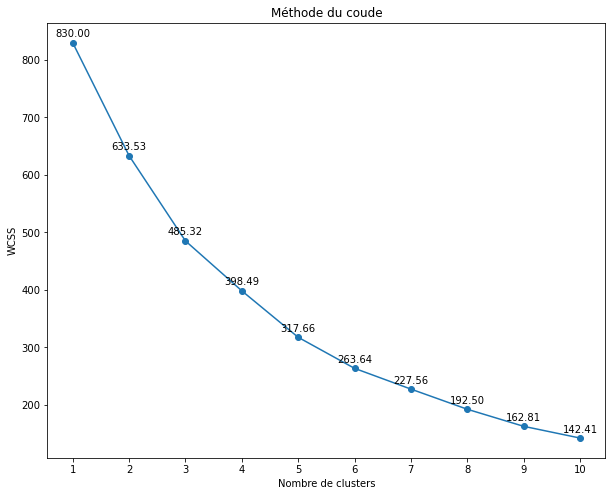

In [106]:
# Déterminer le nombre optimal de clusters en utilisant la méthode du coude
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(1, 11), wcss, marker='o')
for i, w in enumerate(wcss):
    ax.annotate(f'{w:.2f}', xy=(i+1, w), xytext=(i+1, w+10), ha='center', fontsize=10)
plt.xticks(range(1, 11))
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')

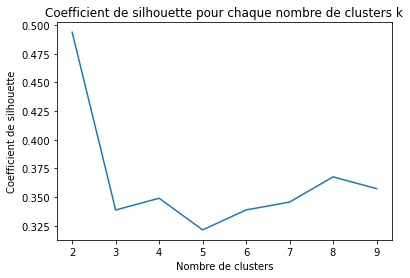

In [107]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(df_std)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_std, labels))

plt.plot(range(2, 10), silhouette_scores)
plt.title('Coefficient de silhouette pour chaque nombre de clusters k')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>
Sur le graphique du coude, j'aurais tendance à choisir entre 5, 6 ou 7 clusters. Toutefois, en examinant les coefficients de silhouette pour ces nombres de clusters, on constate que choisir 7 clusters est plus pertinent. Nous opterons donc pour 7 clusters.
</div></div>

In [108]:
# Appliquer l'algorithme k-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(df_std)

# Ajouter la colonne 'Cluster' au dataframe
Etude_volaille_par_pays_2017['Cluster k-means'] = kmeans.labels_


In [109]:
Etude_volaille_par_pays_2017

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Cluster k-means
Zone,,,,,,,
Afghanistan,29.0,2.0,-2.80,-29.0,520.616409,6,0
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572,1,1
Albanie,38.0,0.0,0.38,-38.0,4514.204908,6,2
Algérie,2.0,13.0,-0.92,-2.0,4109.696001,6,0
Allemagne,842.0,0.0,0.59,-196.0,44651.829102,1,1
...,...,...,...,...,...,...,...
Égypte,110.0,0.0,-1.42,-109.0,2023.331158,6,0
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043,1,1
Équateur,0.0,17.0,-0.07,0.0,6213.501276,6,2


visualisation sur le graph des individus de l'ACP

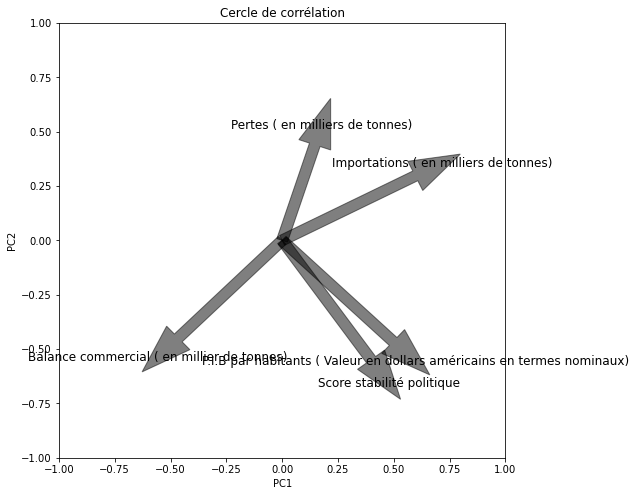

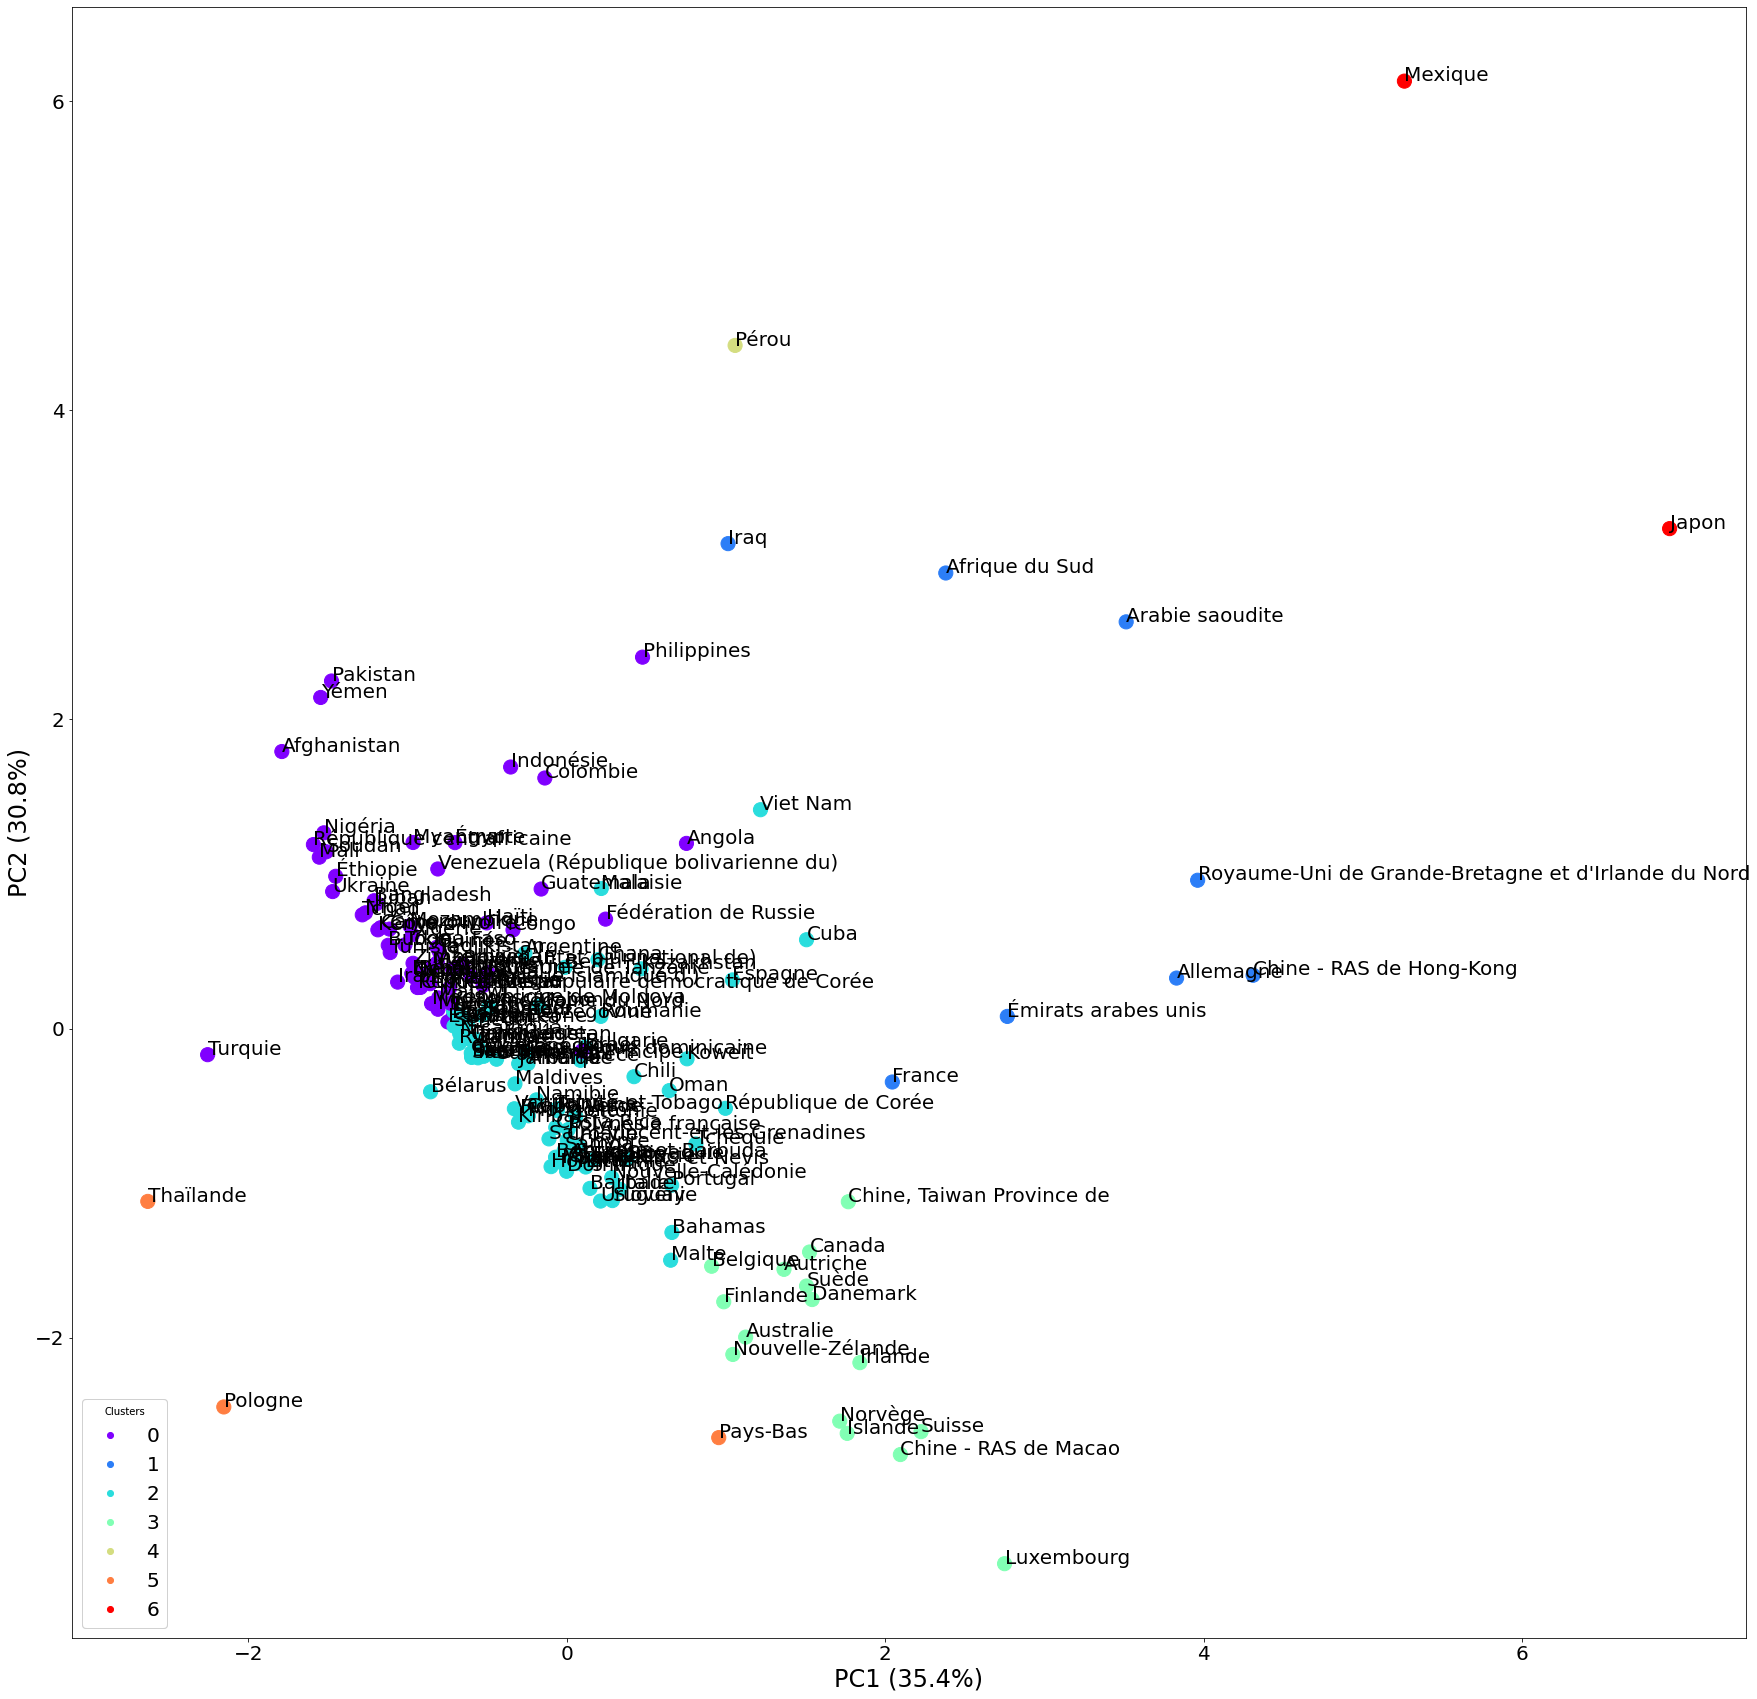

In [110]:
# selection des colonnes numériques
numeric_cols = ['Importations ( en milliers de tonnes)', 'Pertes ( en milliers de tonnes)', 'Score stabilité politique', 'Balance commercial ( en millier de tonnes)', 'P.I.B par habitants ( Valeur en dollars américains en termes nominaux)']
X = Etude_volaille_par_pays_2017[numeric_cols]

# normaliser et centrer les données.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Effectuer une ACP
pca = PCA()
pca.fit(X_scaled)

# Projeter les points des pays sur le plan principal (PC) 1 et 2 :
PC1 = pca.components_[0]
PC2 = pca.components_[1]
X_projected = pca.transform(X_scaled)[:, :2]

# Créer un dataframe contenant les coordonnées des points projetés et les numéros de cluster :
df_projected = pd.DataFrame({'PC1': X_projected[:, 0], 'PC2': X_projected[:, 1], 'Cluster k-means': Etude_volaille_par_pays_2017['Cluster k-means']})

# Afficher le cercle de corrélation :
plt.figure(figsize=(8, 8))
plt.title('Cercle de corrélation')
for i in range(len(numeric_cols)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='black', alpha=0.5, width=0.05)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, numeric_cols[i], color='black', ha='center', va='center', fontsize=12)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Afficher le graphique des individus coloré en fonction de leur cluster :
# Définir la taille de la figure
plt.figure(figsize=(30, 30))

# Créer le scatter plot
scatter = plt.scatter(df_projected['PC1'], df_projected['PC2'], c=df_projected['Cluster k-means'], cmap='rainbow', s=200)

# Ajouter le nom de chaque pays à côté du point
for i, txt in enumerate(Etude_volaille_par_pays_2017.index):
    plt.annotate(txt, (df_projected['PC1'][i], df_projected['PC2'][i]), fontsize=20)

# Ajouter la légende pour les clusters
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters", fontsize=20)
plt.gca().add_artist(legend1)

# Définir les titres des axes
plt.xlabel('PC1 ({:.1%})'.format(pca.explained_variance_ratio_[0]), fontsize=24)
plt.ylabel('PC2 ({:.1%})'.format(pca.explained_variance_ratio_[1]), fontsize=24)

# Définir la taille des ticks sur les axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Afficher le graphique
plt.show()

Heatmap

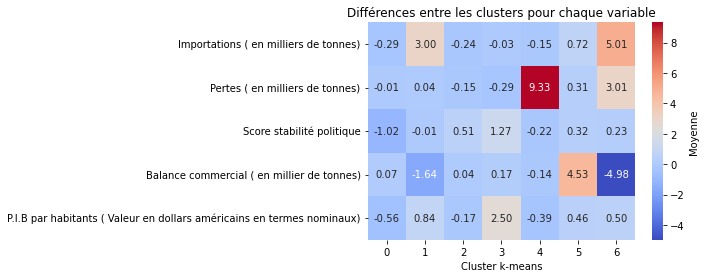

In [111]:
# normaliser les données : 
# Sélectionner les colonnes numériques
numeric_cols = ['Importations ( en milliers de tonnes)', 'Pertes ( en milliers de tonnes)', 'Score stabilité politique', 'Balance commercial ( en millier de tonnes)', 'P.I.B par habitants ( Valeur en dollars américains en termes nominaux)']
X = Etude_volaille_par_pays_2017[numeric_cols]

# Normaliser les données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Créer un dataframe avec les données normalisées
df_std = pd.DataFrame(X_std, columns=numeric_cols, index=Etude_volaille_par_pays_2017.index)
df_std['Cluster k-means'] = Etude_volaille_par_pays_2017['Cluster k-means']

# Créer un dataframe contenant les moyennes de chaque variable par cluster
Etude_volaille_par_pays_2017_k_means_cluster = df_std.groupby('Cluster k-means').mean()

# Transposer le dataframe pour avoir les variables en colonnes
Etude_volaille_par_pays_2017_k_means_cluster = Etude_volaille_par_pays_2017_k_means_cluster.T

# Créer la carte de chaleur
sns.heatmap(Etude_volaille_par_pays_2017_k_means_cluster, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Moyenne'})
plt.title('Différences entre les clusters pour chaque variable')
plt.show()

Moyenne de chaque variable par cluster k means

In [112]:
# grouper les données par le numéro de cluster k-means et calculer la moyenne pour chaque cluster
Etude_volaille_par_pays_2017_par_cluster_kmeans = Etude_volaille_par_pays_2017.groupby('Cluster k-means').mean()
# Ajouter une colonne contenant le nombre de pays par cluster
Etude_volaille_par_pays_2017_par_cluster_kmeans['Nombre de pays'] = Etude_volaille_par_pays_2017['Cluster k-means'].value_counts()

# afficher les moyennes de chaque variable pour chaque cluster
Etude_volaille_par_pays_2017_par_cluster_kmeans

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Nombre de pays
Cluster k-means,,,,,,,
0,34.101695,9.322034,-0.975424,-18.593220,3339.962382,5.864407,59
1,646.625000,11.000000,-0.065000,-354.625000,30547.774311,1.000000,8
2,44.384615,4.512821,0.402692,-23.897436,10922.996759,5.320513,78
3,81.933333,0.000000,1.094000,0.866667,62710.624807,3.933333,15
4,60.000000,316.000000,-0.260000,-59.000000,6710.531503,2.000000,1
5,221.666667,19.666667,0.230000,858.000000,23151.974198,3.000000,3
6,1020.500000,108.500000,0.155000,-1011.000000,23980.124649,1.000000,2


liste des pays pour chaque cluster k-means

In [113]:
for i in range(0,7):
    print("Cluster ", i, ":")
    print(list(Etude_volaille_par_pays_2017.index[Etude_volaille_par_pays_2017['Cluster k-means'] == i]))

Cluster  0 :
['Afghanistan', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Burkina Faso', 'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Fédération de Russie', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Israël', 'Jordanie', 'Kenya', 'Kirghizistan', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mauritanie', 'Mozambique', 'Myanmar', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Philippines', 'République centrafricaine', 'République de Moldova', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Soudan', 'Tadjikistan', 'Tchad', 'Togo', 'Tunisie', 'Turquie', 'Ukraine', 'Venezuela (République bolivarienne du)', 'Yémen', 'Zimbabwe', 'Égypte', 'Éthiopie']
Cluster  1 :
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Iraq', "Roya

Distribution boplot de chaque variable pour chaque cluster

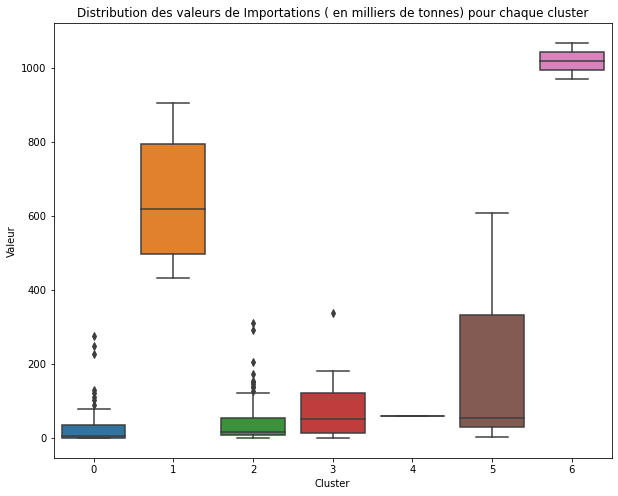

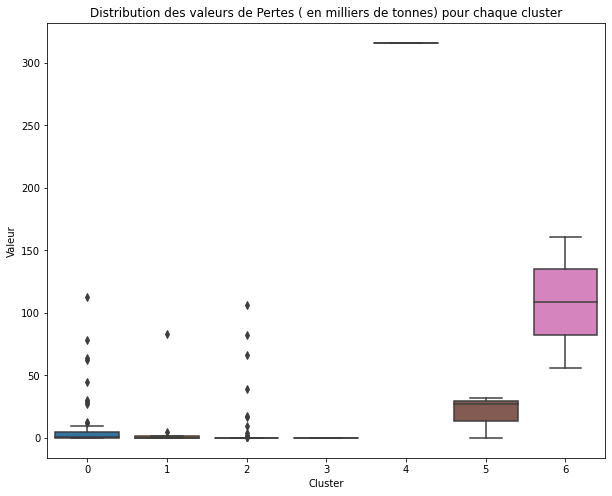

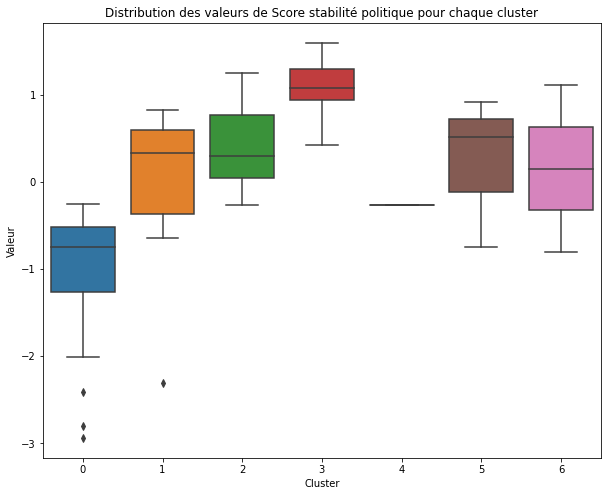

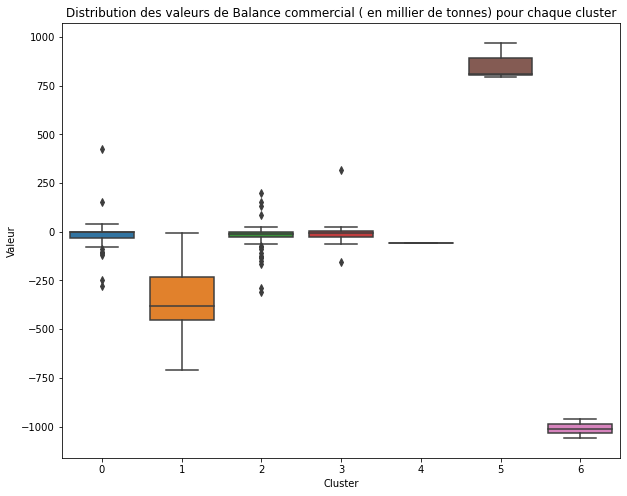

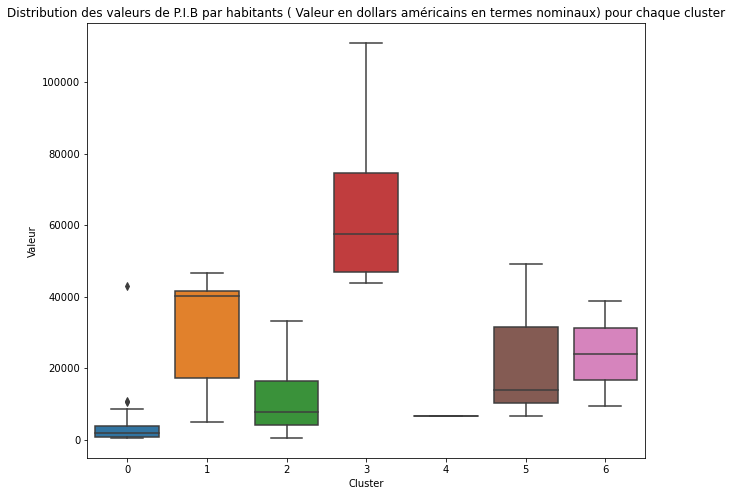

In [114]:
# Sélectionner les colonnes numériques
numeric_cols = ['Importations ( en milliers de tonnes)', 'Pertes ( en milliers de tonnes)', 'Score stabilité politique', 'Balance commercial ( en millier de tonnes)', 'P.I.B par habitants ( Valeur en dollars américains en termes nominaux)']

# Créer un dataframe contenant les données numériques et les clusters attribués
df_clustered = Etude_volaille_par_pays_2017[numeric_cols + ['Cluster k-means']]

# Afficher les boxplots pour chaque variable numérique
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(data=df_clustered, x='Cluster k-means', y=col, ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valeur')
    ax.set_title(f'Distribution des valeurs de {col} pour chaque cluster')
    plt.show()

In [115]:
Etude_volaille_par_pays_2017.loc[['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Iraq', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True)


,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Cluster k-means
Zone,,,,,,,
Arabie saoudite,722.0,0.0,-0.64,-712.0,20802.464928,1,1
Iraq,470.0,5.0,-2.31,-470.0,4985.453728,1,1
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572,1,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,0.0,0.39,-420.0,40448.365862,1,1
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043,1,1
Chine - RAS de Hong-Kong,907.0,0.0,0.83,-244.0,46705.027813,1,1
Allemagne,842.0,0.0,0.59,-196.0,44651.829102,1,1
France,506.0,0.0,0.28,-5.0,40022.372441,1,1


In [116]:
Etude_volaille_par_pays_2017.loc[['Albanie', 'Antigua-et-Barbuda', 'Argentine', 'Bahamas', 'Barbade', 'Belize', 'Botswana', 'Bulgarie', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Fidji', 'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guyana', 'Hongrie', 'Italie', 'Jamaïque', 'Kazakhstan', 'Kiribati', 'Koweït', 'Lesotho', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Malaisie', 'Maldives', 'Malte', 'Maurice', 'Mongolie', 'Monténégro', 'Namibie', 'Nicaragua', 'Nouvelle-Calédonie', 'Oman', 'Panama', 'Paraguay', 'Polynésie française', 'Portugal', 'Roumanie', 'Rwanda', 'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Slovaquie', 'Slovénie', 'Sri Lanka', 'Suriname', 'Sénégal', 'Tchéquie', 'Timor-Leste', 'Trinité-et-Tobago', 'Turkménistan', 'Uruguay', 'Vanuatu', 'Viet Nam', 'Zambie', 'Équateur', 'Îles Salomon']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True).head(10)



,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Cluster k-means
Zone,,,,,,,
Cuba,312.0,0.0,0.65,-312.0,8541.214440,5,2
Viet Nam,291.0,39.0,0.23,-290.0,2365.521494,5,2
Kazakhstan,174.0,0.0,0.03,-168.0,9225.974208,5,2
Ghana,151.0,0.0,0.09,-151.0,2074.175443,5,2
Koweït,137.0,0.0,-0.05,-133.0,29754.636332,4,2
République de Corée,137.0,0.0,0.39,-131.0,31781.123320,4,2
Bénin,123.0,0.0,0.03,-123.0,1136.593360,5,2
Oman,126.0,0.0,0.75,-110.0,15130.543438,5,2
Tchéquie,116.0,0.0,1.00,-89.0,20545.836143,5,2


In [117]:
Etude_volaille_par_pays_2017.loc[['Japon', 'Mexique']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True).head(10)


,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Cluster k-means
Zone,,,,,,,
Japon,1069.0,56.0,1.11,-1059.0,38672.407740,1,6
Mexique,972.0,161.0,-0.80,-963.0,9287.841557,1,6


In [118]:
# Afficher les pays candidants de tous les clusters et le classer par balance commercial croissante.
Etude_volaille_par_pays_2017.loc[['Arabie saoudite', 'Afrique du Sud',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis', 'Chine - RAS de Hong-Kong', 'Allemagne', 'Japon', 'Mexique']].sort_values(by='Balance commercial ( en millier de tonnes)', ascending=True).head(10)

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Cluster k-means
Zone,,,,,,,
Japon,1069.0,56.0,1.11,-1059.0,38672.407740,1,6
Mexique,972.0,161.0,-0.80,-963.0,9287.841557,1,6
Arabie saoudite,722.0,0.0,-0.64,-712.0,20802.464928,1,1
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572,1,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,0.0,0.39,-420.0,40448.365862,1,1
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043,1,1
Chine - RAS de Hong-Kong,907.0,0.0,0.83,-244.0,46705.027813,1,1
Allemagne,842.0,0.0,0.59,-196.0,44651.829102,1,1


## <span style='font-family:Garamond'>3. Analyse et observation des resultats de la classification ascendante hierarchique</span> <a class="anchor" id="section_2_3"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>

**Déscription des clusters de la classification ascendante hierarchique :**

<u>**Cluster 0 :**</u>

Pays : 'Afghanistan', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Burkina Faso', 'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Fédération de Russie', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Indonésie', "Iran (République islamique d')", 'Israël', 'Jordanie', 'Kenya', 'Kirghizistan', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mauritanie', 'Mozambique', 'Myanmar', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Philippines', 'République centrafricaine', 'République de Moldova', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Soudan', 'Tadjikistan', 'Tchad', 'Togo', 'Tunisie', 'Turquie', 'Ukraine', 'Venezuela (République bolivarienne du)', 'Yémen', 'Zimbabwe', 'Égypte', 'Éthiopie'.

Moyenne des valeurs pour chaque variable :

- Importations (en milliers de tonnes) : 34.101695
- Pertes (en milliers de tonnes) : 9.322034
- Score stabilité politique : -0.975424
- Balance commerciale (en millier de tonnes) : -18.593220
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 3339.962382	
    
    
Influence des variables : Plutôt homogène.


Le cluster 0 est caractérisé par une faible importation et une balance commerciale relativement neutre. Cependant, l'analyse des boxplots révèle la présence de certains outliers avec une balance commerciale déficitaire, ce qui nécessiterait une analyse plus approfondie de ces pays.

De plus, il est important de souligner que ce cluster regroupe des pays avec les scores de stabilité politique les plus bas, ce qui pourrait constituer un frein à notre projet (aucun pays n'a de score supérieur à 0). De même, il affiche la valeur la plus basse en termes de PIB par habitant. Pour ces raisons, je décide d'exclure ce groupe car je le considère peu intéressant.

<u>**Cluster 1 :**</u>

Pays : 'Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Iraq', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis'.

Moyenne des valeurs pour chaque variable :

- Importations (en milliers de tonnes) : 646.625000
- Pertes (en milliers de tonnes) : 11.000000
- Score stabilité politique : -0.065000
- Balance commerciale (en millier de tonnes) : -354.625000	
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 30547.774311

Influence des variables : importation, PIB par habitant.

Le cluster 1 se distingue par des importations importantes (deuxième cluster le plus important), ainsi qu'une balance commerciale déficitaire (la deuxième plus déficitaire après le cluster 6). Par conséquent, ce groupe de pays est intéressant car il possède un bon PIB par habitant (le deuxième plus élevé) et une stabilité politique moyenne. Toutefois, il est nécessaire de vérifier individuellement le score de stabilité politique de chaque pays avant de le choisir définitivement. Ce cluster comprend également des pays avec très peu de pertes. On peut en conclure que ce cluster ne présente aucun frein et que les pays qui y figurent peuvent être considérés comme des candidats potentiels pour nos exportations. Il suffit simplement de vérifier le score de stabilité politique de chaque pays avant de prendre une décision finale.
    
 **Selection de pays dans le cluster**
    
Arabie saoudite		
Afrique du Sud	
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord	
Émirats arabes unis
Chine - RAS de Hong-Kong	
Allemagne	

<u>**Cluster 2 :**</u>

Pays : 'Albanie', 'Antigua-et-Barbuda', 'Argentine', 'Bahamas', 'Barbade', 'Belize', 'Botswana', 'Bulgarie', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Chili', 'Chypre', 'Costa Rica', 'Croatie', 'Cuba', 'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Fidji', 'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guyana', 'Hongrie', 'Italie', 'Jamaïque', 'Kazakhstan', 'Kiribati', 'Koweït', 'Lesotho', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Malaisie', 'Maldives', 'Malte', 'Maurice', 'Mongolie', 'Monténégro', 'Namibie', 'Nicaragua', 'Nouvelle-Calédonie', 'Oman', 'Panama', 'Paraguay', 'Polynésie française', 'Portugal', 'Roumanie', 'Rwanda', 'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Slovaquie', 'Slovénie', 'Sri Lanka', 'Suriname', 'Sénégal', 'Tchéquie', 'Timor-Leste', 'Trinité-et-Tobago', 'Turkménistan', 'Uruguay', 'Vanuatu', 'Viet Nam', 'Zambie', 'Équateur', 'Îles Salomon'
    
- Importations (en milliers de tonnes) : 44.384615
- Pertes (en milliers de tonnes) : 4.512821
- Score stabilité politique : 0.402692
- Balance commerciale (en millier de tonnes) : -23.897436
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 10922.996759  
    
Influence des variables : Plutôt homogène.

Le cluster 2 possède une balance commerciale légèrement déficitaire. On peut noter plusieurs outliers avec une balance relativement déficitaire. Il possède un score de stabilité politique très bon (le deuxième plus élevé) et des pertes peu importantes.

En revanche, ce groupe de pays a un PIB par habitant asser faible (pays plutôt pauvre), ce qui empêche ces pays d'être candidats pour nos exportations. Pour ce groupe, je pense qu'il faudrait trier les pays par ordre de balance commerciale décroissante et vérifier s'ils présentent des freins (PIB par habitant faible, score de stabilité politique faible, etc.).
    
<u>**Cluster 3 :**</u>

Pays : 'Australie', 'Autriche', 'Belgique', 'Canada', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Danemark', 'Finlande', 'Irlande', 'Islande', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande', 'Suisse', 'Suède'.

- Importations (en milliers de tonnes) :  81.933333
- Pertes (en milliers de tonnes) : 0
- Score stabilité politique : 1.094000
- Balance commerciale (en millier de tonnes) : 0.866667
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 62710.624807		

Influence des variables : PIB par habtant et score stabilité politique.

Le cluster 3 est un groupe caractérisé par un PIB par habitant très élevé (le plus élevé), une balance commerciale relativement neutre et un score de stabilité politique élevé (le plus élevé également). En revanche, ce groupe de pays importe de manière modérée. Cependant, ce groupe de pays n'est pas très intéressant car ils sont relativement autonomes, donc je décide de ne pas le retenir pour mon analyse car il est certains que d'autres pays soient plus interessant.
    
<u>**Cluster 4 :**</u>

Pays : Pérou.

- Importations (en milliers de tonnes) :   60.000000
- Pertes (en milliers de tonnes) : 316.000000
- Score stabilité politique : -0.260000
- Balance commerciale (en millier de tonnes) : -59.000000
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 6710.531503	2.000000
    
   
Influence des variables : Pertes

Comme vue lors du premier clustering : Le Pérou est un pays avec une balance commerciale déficitaire, ce qui pourrait en faire un pays candidat de prime abord. Cependant, il possède un PIB par habitant faible et est très éloigné de la France, ce qui ne facilitera pas l'implantation. De plus, il subit de nombreuses pertes, ce qui indique qu'il est difficile de stocker cette viande. Tout cela constitue des obstacles qui l'écartent de la catégorie des pays candidats.

<u>**Cluster 5 :**</u>
    
Pays : 'Pays-Bas', 'Pologne', 'Thaïlande'.

- Importations (en milliers de tonnes) : 221.666667
- Pertes (en milliers de tonnes) : 19.666667
- Score stabilité politique : 0.230000
- Balance commerciale (en millier de tonnes) : 858.000000
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 23151.974198

    
Influence des variables : Balance commercial.
    
Le Cluster 5 possède un niveau de balance commerciale très élevé, le plus haut (+858 000 000), ce qui rend les pays de ce groupe inintéressants pour nous.


<u>**Cluster 6 :**</u>

Pays : 'Japon', 'Mexique'
    
- Importations (en milliers de tonnes) :  1020.50
- Pertes (en milliers de tonnes) : 108.50
- Score stabilité politique : 0.155000
- Balance commerciale (en millier de tonnes) : -1011.00
- PIB par habitant (Valeur en dollars américains en termes nominaux) : 23980.124649	    

Influence des variables : Importations, Pertes et Balance commerciale.
    
Le Cluster 6 regroupe, selon moi, les deux pays idéaux pour notre exportation, en fonction de nos variables (la distance avec ces pays pourrait peut-être être un frein au choix de ces États). Il possède une balance commerciale fortement déficitaire, avec beaucoup d'importations. Le score de stabilité politique ainsi que le PIB par habitant sont corrects. Un petit bémol avec les pertes où il faudrait creuser pourquoi ces pays subissent un nombre de pertes important et est-ce que cela pourrait être dérangeant ou pas pour nous.
    
    
 **Selection de pays dans le cluster**

Japon<br>
Mexique
    
Petit bémol pour le Mexique qui possède un score de stabilité politique négatif (-0.8), un volume de pertes important et un PIB par habitant plus faible que celui du Japon. Toutefois, il paraît quand même intéressant en comparaison avec les autres pays. 
<br>
    <br>
    <br>
        <br>
 **Selection final de pays pour la methode des kmeans**
    
Arabie saoudite,
Afrique du Sud, 
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, 
Émirats arabes unis, 
Chine - RAS de Hong-Kong, 
Allemagne, 
Japon, 
Mexique.
    
</div></div>

## <span style='font-family:Garamond'>4. Conclusion</span> <a class="anchor" id="section_2_4"></a>

In [119]:
# compiler tous les pays candidats de chaque clustering.
PAYS_CANDIDATS = Etude_volaille_par_pays_2017.loc[['Arabie saoudite', 'Afrique du Sud',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis', 'Chine - RAS de Hong-Kong', 'Allemagne', 'Japon', 'Mexique','Chine, Taiwan Province de', 'Koweït', 'République de Corée', 'Suède', 'Suisse', 'Autriche', 'Bahamas', 'Chine - RAS de Macao']]
PAYS_CANDIDATS = PAYS_CANDIDATS.sort_values('Balance commercial ( en millier de tonnes)', ascending=True)
PAYS_CANDIDATS

,Importations ( en milliers de tonnes),Pertes ( en milliers de tonnes),Score stabilité politique,Balance commercial ( en millier de tonnes),P.I.B par habitants ( Valeur en dollars américains en termes nominaux),Numéro_de_cluster_pour_la_classification_hiérarchique,Cluster k-means
Zone,,,,,,,
Japon,1069.0,56.0,1.11,-1059.0,38672.407740,1,6
Mexique,972.0,161.0,-0.80,-963.0,9287.841557,1,6
Arabie saoudite,722.0,0.0,-0.64,-712.0,20802.464928,1,1
Afrique du Sud,514.0,83.0,-0.28,-451.0,6121.876572,1,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,0.0,0.39,-420.0,40448.365862,1,1
Émirats arabes unis,433.0,0.0,0.62,-339.0,40644.804043,1,1
Chine - RAS de Hong-Kong,907.0,0.0,0.83,-244.0,46705.027813,1,1
Allemagne,842.0,0.0,0.59,-196.0,44651.829102,1,1
"Chine, Taiwan Province de",161.0,0.0,0.86,-153.0,48786.574408,4,3


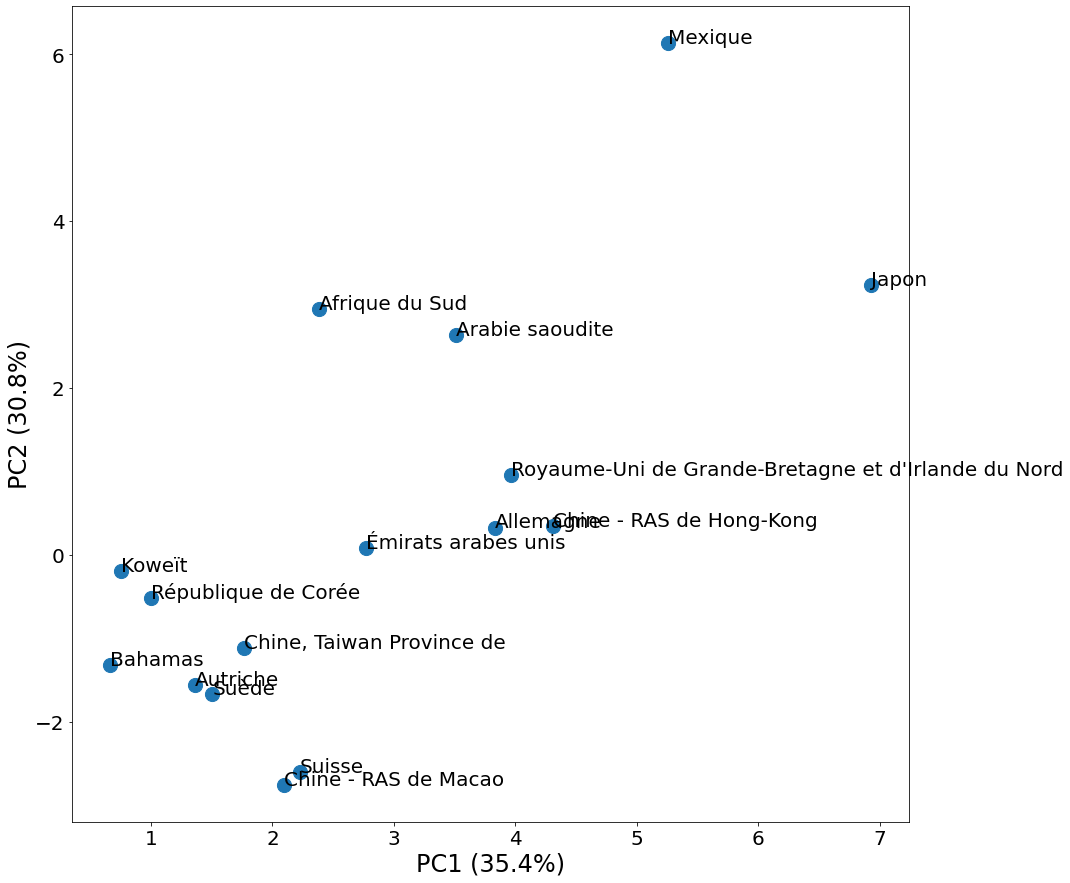

In [120]:
# Sélectionner les pays à afficher
pays_a_afficher = ['Arabie saoudite', 'Afrique du Sud',"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis', 'Chine - RAS de Hong-Kong', 'Allemagne', 'Japon', 'Mexique','Chine, Taiwan Province de', 'Koweït', 'République de Corée', 'Suède', 'Suisse', 'Autriche', 'Bahamas', 'Chine - RAS de Macao']

# Sélectionner les lignes correspondant aux pays à afficher
df_projected_filtered = df_projected.loc[df_projected.index.isin(pays_a_afficher)]

# Définir la taille de la figure
plt.figure(figsize=(15, 15))

# Créer le scatter plot
scatter = plt.scatter(df_projected_filtered['PC1'], df_projected_filtered['PC2'],s=200)

# Ajouter le nom de chaque pays à côté du point
for i, txt in enumerate(df_projected_filtered.index):
    plt.annotate(txt, (df_projected_filtered['PC1'][i], df_projected_filtered['PC2'][i]), fontsize=20)


# Définir les titres des axes
plt.xlabel('PC1 ({:.1%})'.format(pca.explained_variance_ratio_[0]), fontsize=24)
plt.ylabel('PC2 ({:.1%})'.format(pca.explained_variance_ratio_[1]), fontsize=24)

# Définir la taille des ticks sur les axes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Afficher le graphique
plt.show()

<div style='font-family:Garamond'><div style='font-size: 20px'>

**Avantages et inconvénients de la CAH :**

Avantages :

La CAH permet de découvrir des structures hiérarchiques et des sous-groupes de données, ce qui peut être utile pour comprendre les relations entre les variables et les observations.Elle ne nécessite pas de spécification en amont du nombre de clusters, car elle utilise une approche ascendante pour construire la hiérarchie.

Inconvénients :

La CAH est sensible aux données aberrantes (outliers) qui peuvent perturber la structure de la hiérarchie (Sensible peut être dans notre cas au Perou, Mexique, Japon). Egalement elle peut être difficile à interpréter lorsque la hiérarchie est très complexe et choisir un nombre de cluster à l'oeil est inpréçis.


**Avantages et inconvénients du clustering k-means :**

Avantages :

Le clustering k-means est simple et rapide à exécuter, même pour de grands ensembles de données. Il est facile à interpréter, car les résultats sont présentés sous forme de clusters de données. l'algorithme k-means fonctionne bien lorsque les groupes sont bien séparés.

Inconvénients :

Il nécessite la spécification a priori du nombre de clusters, ce qui peut être difficile à déterminer ( Méthode du coude, coefficient de sillouette). Il fonctionne moins bien lorsque les groupes ont des formes irrégulières ou lorsque les données sont très dispersées. Le clustering k-means est sensible à l'emplacement initial des centres des clusters, ce qui peut entraîner des résultats différents selon l'initialisation, c'est pour celà qu'on utilise une fonction qui réitère l'algorithme plusieurs fois.


**Intérêts de faire les deux :**

La CAH et le clustering k-means ont des approches différentes pour l'analyse des données, mais elles peuvent être complémentaires. Par exemple, la CAH peut aider à identifier des groupes de données de manière hiérarchique. Tandis que le clustering k-means peut fournir une segmentation claire des données en groupes distincts.L'utilisation de plusieurs méthodes de clustering permet de valider les résultats et de mieux comprendre la robustesse des clusters identifiés.
    
</div></div>

<div style='font-family:Garamond'><div style='font-size: 20px'>
Voici la liste final de pays retenue ( par deficit de balance commercial croissant) : 
    
Japon	
Mexique	
Arabie saoudite	
Afrique du Sud	
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord	
Émirats arabes unis
Chine - RAS de Hong-Kong	
Allemagne	
Chine, Taiwan Province de
Koweït	
République de Corée	
Suède	
Suisse	
Autriche
Bahamas	
Chine - RAS de Macao	
    
Afin de sélectionner un pays, il conviendrait de pousser l'analyse afin de savoir si d'autres freins n'empêchent pas l'implantation dans le pays, comme savoir si les niveaux de stabilité politique sont réellement suffisants, si la distance avec la France n'empêche pas l'exportation, etc.
    
</div></div>

In [121]:
# exporter la liste des pays candidants au format CSV
PAYS_CANDIDATS.to_csv('PAYS_CANDIDATS.csv', index=True)